In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.int8)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
split_index = 60000  # First 60k images for training, remaining 10k for testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28*28) / 255.0
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [5]:
X_train, y_train = X_train[:10000], y_train[:10000]
X_test, y_test = X_test[:2000], y_test[:2000]

In [6]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='linear', C=1))])

pipe_1.fit(X_train, y_train)

# Evaluate the model using cross-validation
acc = cross_val_score(pipe_1, X_train, y_train, cv=2)
print("Training Accuracy (Linear SVM): {:.2f} %".format(acc.mean() * 100))

Training Accuracy (Linear SVM): 91.07 %


In [7]:
y_pred_1 = pipe_1.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_1)
print("Classification Report (Linear SVM):")
print(classification_report(y_test, y_pred_1))

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



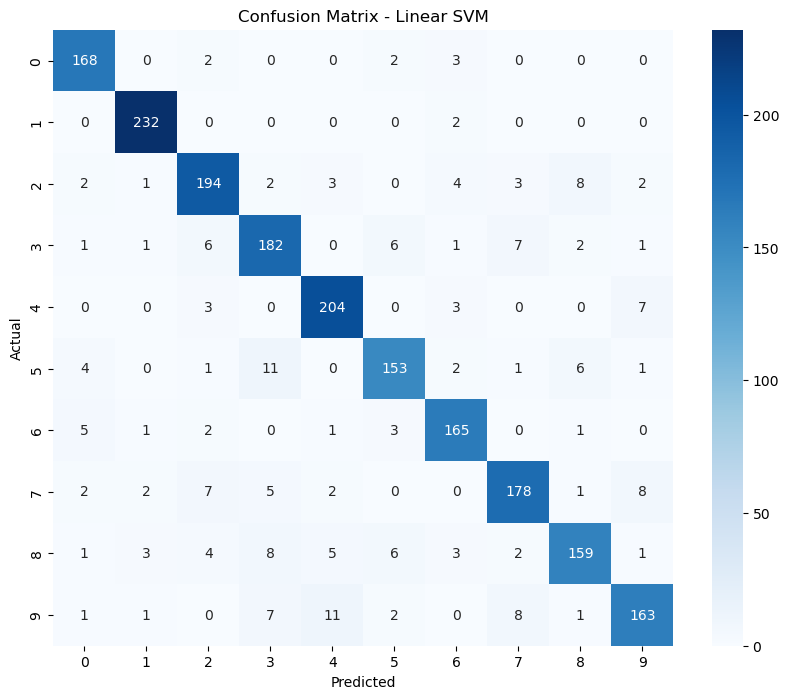

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))])

pipe_2.fit(X_train, y_train)

# Evaluate the model using cross-validation
acc = cross_val_score(pipe_2, X_train, y_train, cv=2)
print("Training Accuracy (Nonlinear SVM): {:.2f} %".format(acc.mean() * 100))

Training Accuracy (Nonlinear SVM): 82.68 %


In [10]:
y_pred_2 = pipe_2.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_2)
print("Classification Report (Nonlinear SVM):")
print(classification_report(y_test, y_pred_2))

Classification Report (Nonlinear SVM):
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.46      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.72      0.84       178
           7       0.96      0.78      0.86       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



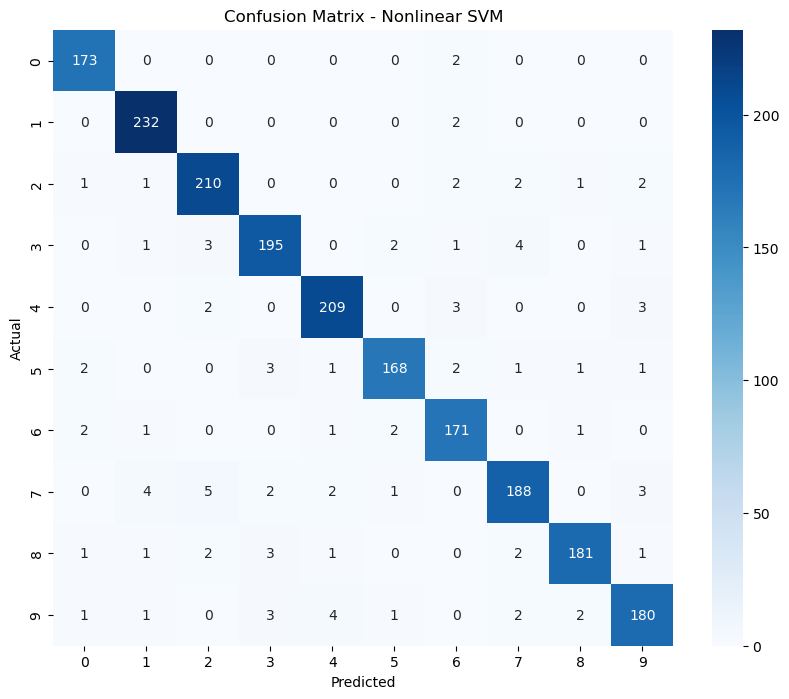

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Nonlinear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipe_2, param_grid, cv=2, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f} %".format(grid_search.best_score_ * 100))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best parameters found:  {'classifier__C': 10, 'classifier__gamma': 0.01}
Best cross-validation accuracy: 95.08 %


In [14]:
y_pred_best = grid_search.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_best)
print("Classification Report (Best SVM Model):")
print(classification_report(y_test, y_pred_best))

Classification Report (Best SVM Model):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.96      0.99      0.98       234
           2       0.95      0.96      0.95       219
           3       0.95      0.94      0.94       207
           4       0.96      0.96      0.96       217
           5       0.97      0.94      0.95       179
           6       0.93      0.96      0.95       178
           7       0.94      0.92      0.93       205
           8       0.97      0.94      0.96       192
           9       0.94      0.93      0.94       194

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



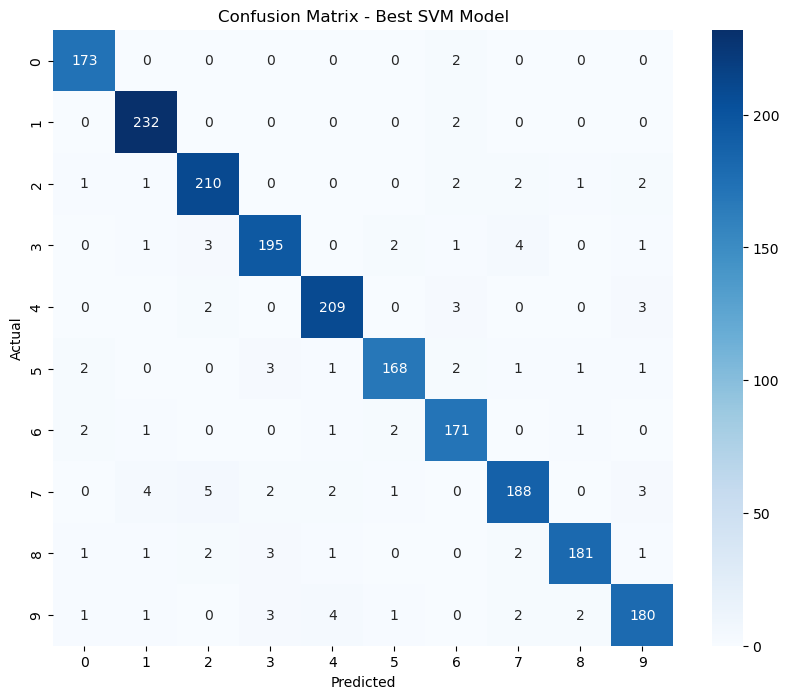

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best SVM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()